Found 44 files belonging to 2 classes.
Using 36 files for training.
Found 44 files belonging to 2 classes.
Using 8 files for validation.
['Hearing Impaired', 'Not Hearing Impaired']


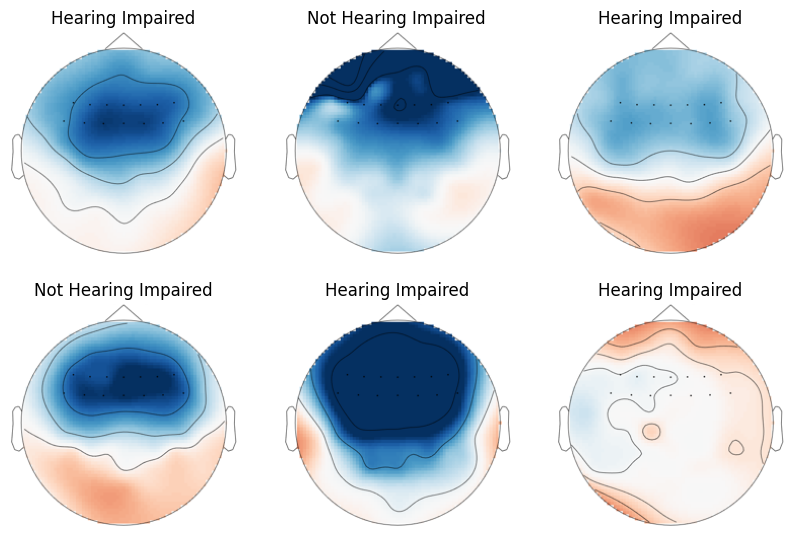

In [58]:
# resnet50 model on a subclass, so just one component/time which is only 44 images

import matplotlib.pyplot as plt
import numpy as np
# import osM
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Preparing The Data
import pathlib

# Update the dataset directory
data_dir = pathlib.Path("C:/Users/student/Documents/snhl-ERP/machine learning/N1")
# print(data_dir)

# Replace the existing logic for loading and preprocessing images with your own
# ...

# Modify the class names according to your dataset's classes
class_names = ["Hearing Impaired", "Healthy"]

img_height,img_width=224,224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
  
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
class_names = train_ds.class_names
print(class_names)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")




In [59]:
# Training The Model

resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))  # Updated output layer
resnet_model.summary()
resnet_model.compile(optimizer=Adam(lr=1),loss='categorical_crossentropy',metrics=['accuracy'])
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_33 (ModuleWr  (None, 2048)             0         
 apper)                                                          
                                                                 
 module_wrapper_34 (ModuleWr  (None, 512)              1049088   
 apper)                                                          
                                                                 
 module_wrapper_35 (ModuleWr  (None, 1)                513       
 apper)                                                          
                                                                 
Total params: 24,637,313
Trainable params: 1,049,601
Non-trainable params: 23,587,712
_________________________________

c:\Users\student\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2/2 [==============================] - 7s 3s/step - loss: 0.0000e+00 - accuracy: 0.5278 - val_loss: 0.0000e+00 - val_accuracy: 0.3750
Epoch 2/10
2/2 [==============================] - 0s 85ms/step - loss: 0.0000e+00 - accuracy: 0.5278 - val_loss: 0.0000e+00 - val_accuracy: 0.3750
Epoch 3/10
2/2 [==============================] - 0s 83ms/step - loss: 0.0000e+00 - accuracy: 0.5278 - val_loss: 0.0000e+00 - val_accuracy: 0.3750
Epoch 4/10
2/2 [==============================] - 0s 84ms/step - loss: 0.0000e+00 - accuracy: 0.5278 - val_loss: 0.0000e+00 - val_accuracy: 0.3750
Epoch 5/10
2/2 [==============================] - 0s 87ms/step - loss: 0.0000e+00 - accuracy: 0.5278 - val_loss: 0.0000e+00 - val_accuracy: 0.3750
Epoch 6/10
2/2 [==============================] - 0s 79ms/step - loss: 0.0000e+00 - accuracy: 0.5278 - val_loss: 0.0000e+00 - val_accuracy: 0.3750
Epoch 7/10
2/2 [==============================] - 0s 130ms/step - loss: 0.0000e+00 - accuracy: 0.5278 - val_loss: 0.0000e+00 - val_

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Preparing The Data
import pathlib

# Update the dataset directory
data_dir = pathlib.Path("C:/Users/student/Documents/snhl-ERP/machine learning/N1")

# Define image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 8

# Data Augmentation
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomRotation(0.2),
        layers.experimental.preprocessing.RandomZoom(0.2),
        layers.experimental.preprocessing.Rescaling(1.0 / 255),
    ]
)

# Load and preprocess the training and validation datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode="binary",
    shuffle=True,
    interpolation="bilinear",
    follow_links=False,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode="binary",
    shuffle=True,
    interpolation="bilinear",
    follow_links=False,
)

# Configure dataset for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# Define the base model (ResNet50) with pre-trained weights
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(img_height, img_width, 3),
    pooling="avg",
)

# Freeze the layers of the base model
base_model.trainable = False

# Build the model
model = Sequential([
    data_augmentation,
    base_model,
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer=Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Found 44 files belonging to 2 classes.
Using 36 files for training.
Found 44 files belonging to 2 classes.
Using 8 files for validation.
Epoch 1/10
5/5 [==============================] - 12s 556ms/step - loss: 0.9451 - accuracy: 0.4722 - val_loss: 1.1461 - val_accuracy: 0.3750
Epoch 2/10
5/5 [==============================] - 1s 119ms/step - loss: 0.8369 - accuracy: 0.4722 - val_loss: 0.6724 - val_accuracy: 0.6250
Epoch 3/10
5/5 [==============================] - 1s 110ms/step - loss: 0.7257 - accuracy: 0.5278 - val_loss: 0.8370 - val_accuracy: 0.3750
Epoch 4/10
5/5 [==============================] - 1s 113ms/step - loss: 0.7525 - accuracy: 0.5278 - val_loss: 0.6624 - val_accuracy: 0.6250
Epoch 5/10
5/5 [==============================] - 1s 108ms/step - loss: 0.7346 - accuracy: 0.4722 - val_loss: 0.7504 - val_accuracy: 0.3750
Epoch 6/10
5/5 [==============================] - 1s 107ms/step - loss: 0.9019 - accuracy: 0.5278 - val_loss: 0.7528 - val_accuracy: 0.3750
Epoch 7/10
5/5 [======

Found 212 files belonging to 2 classes.
Using 170 files for training.
Found 212 files belonging to 2 classes.
Using 42 files for validation.
['Healthy', 'Hearimg Impaired']


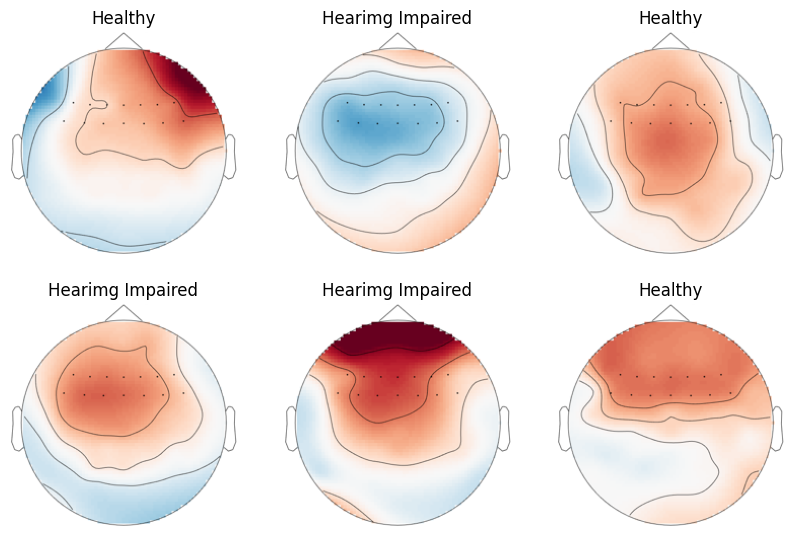

In [51]:
# resnet50 model on 2 classes where each patient has 5 images that come from different time points. accuracy is not the best

import matplotlib.pyplot as plt
import numpy as np
# import osM
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Preparing The Data
import pathlib

# Update the dataset directory
data_dir = pathlib.Path("C:\\Users\\student\\Documents\\snhl-ERP\\machine learning\\generalized-dataset")
# print(data_dir)

# Replace the existing logic for loading and preprocessing images with your own
# ...

# Modify the class names according to your dataset's classes
class_names = ["Hearing Impaired", "Healthy"]

img_height,img_width=224,224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
  
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
class_names = train_ds.class_names
print(class_names)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")



In [54]:
# Training The Model

resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))  # Updated output layer
resnet_model.summary()
resnet_model.compile(optimizer=Adam(lr=1),loss='categorical_crossentropy',metrics=['accuracy'])
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_30 (ModuleWr  (None, 2048)             0         
 apper)                                                          
                                                                 
 module_wrapper_31 (ModuleWr  (None, 512)              1049088   
 apper)                                                          
                                                                 
 module_wrapper_32 (ModuleWr  (None, 1)                513       
 apper)                                                          
                                                                 
Total params: 24,637,313
Trainable params: 1,049,601
Non-trainable params: 23,587,712
_________________________________

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import osM
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
# Preparing The Data
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
print(data_dir)
roses = list(data_dir.glob('roses/*'))
print(roses[0])
PIL.Image.open(str(roses[0]))
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
class_names = train_ds.class_names
print(class_names)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Training The Model

resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))
resnet_model.summary()
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
# Evaluating The Model
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()
# Making Predictions
import cv2
image=cv2.imread(str(roses[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

pred=resnet_model.predict(image)
print(pred)
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Preparing The Data

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 5s 0us/step


In [ ]:
print(data_dir)

/root/.keras/datasets/flower_photos


/root/.keras/datasets/flower_photos/roses/14970973709_968910640e_n.jpg


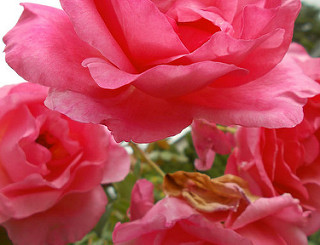

In [ ]:
roses = list(data_dir.glob('roses/*'))
print(roses[0])
PIL.Image.open(str(roses[0]))

In [ ]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


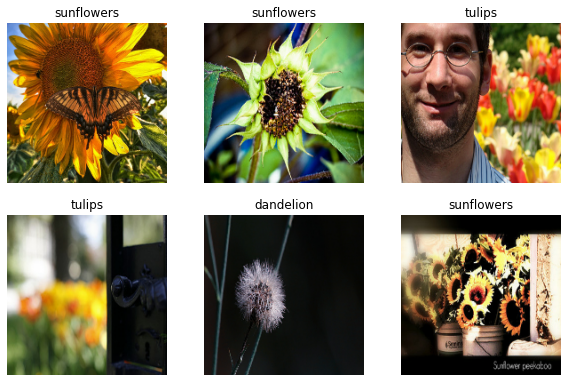

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Training The Model


In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 2565      
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 418s 5s/step - loss: 0.7422 - accuracy: 0.7715 - val_loss: 0.4269 - val_accuracy: 0.8488
Epoch 2/10
92/92 [==============================] - 396s 4s/step - loss: 0.2997 - accuracy: 0.8879 - val_loss: 0.3935 - val_accuracy: 0.8488
Epoch 3/10
92/92 [==============================] - 387s 4s/step - loss: 0.1788 - accuracy: 0.9380 - val_loss: 0.3644 - val_accuracy: 0.8638
Epoch 4/10
92/92 [==============================] - 391s 4s/step - loss: 0.1041 - accuracy: 0.9659 - val_loss: 0.4643 - val_accuracy: 0.8392
Epoch 5/10
92/92 [==============================] - 386s 4s/step - loss: 0.0598 - accuracy: 0.9843 - val_loss: 0.3616 - val_accuracy: 0.8774
Epoch 6/10
92/92 [==============================] - 387s 4s/step - loss: 0.0279 - accuracy: 0.9976 - val_loss: 0.3967 - val_accuracy: 0.8787
Epoch 7/10
92/92 [==============================] - 386s 4s/step - loss: 0.0143 - accuracy: 0.9993 - val_loss: 0.4017 - val_accuracy: 0.8937
Epoch 8/10
92

# Evaluating The Model

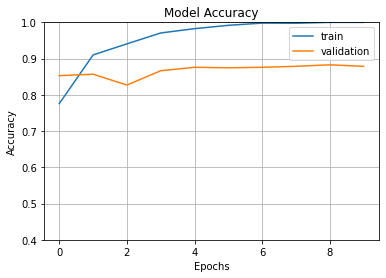

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

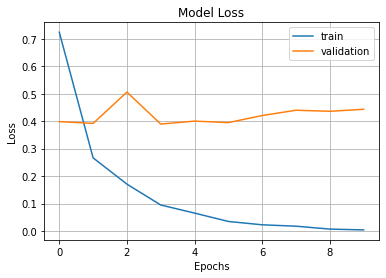

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Making Predictions

In [ ]:
import cv2
image=cv2.imread(str(roses[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


(1, 180, 180, 3)


In [ ]:
pred=resnet_model.predict(image)
print(pred)

[[8.2068445e-06 1.5209365e-06 9.9347222e-01 9.5006551e-05 6.4231041e-03]]


In [ ]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is roses
